**What score did you receive?**

24%

**Did any of the answers surprise you?**

I am kind of superised that the world is not as bad as I thought. Such as majority of the world population live middle income countries, and the life expectancy of the world population is 70 years. 


Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

In [ ]:
Original question : Where does the majority of the world population live?

In [240]:
country_data

country        income_groups
1       abw          high_income
2       afg           low_income
3       ago  upper_middle_income
7       alb  upper_middle_income
8       and          high_income
..      ...                  ...
265     wsm  lower_middle_income
266     yem  lower_middle_income
270     zaf  upper_middle_income
271     zmb  lower_middle_income
272     zwe           low_income

[214 rows x 2 columns]

In [278]:
country_data = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "income_groups"]]
population_data = pd.read_csv("data/ddf--datapoints--total_population_with_projections--by--geo--time.csv")
population_data.dropna(inplace = True)
country_data.dropna(inplace = True)
income_dataset = pd.merge(country_data, population_data, left_on = "country", right_on = "geo")

In [281]:
plot_data.reset_index()

income_groups    time  total_population_with_projections
0          high_income  144720                         1260191060
1           low_income   72360                          802669800
2  lower_middle_income   94470                         2450094050
3  upper_middle_income  110550                         2356705437

In [292]:
%matplotlib inline
plot_data = income_dataset[income_dataset["time"] == 2010].groupby("income_groups").sum()
plot_data = plot_data.reset_index()
plt.bar(plot_data["income_groups"], plot_data["total_population_with_projections"])
plt.xticks(np.arange(4), plot_data["income_groups"], fontsize=10, rotation=45)

([<matplotlib.axis.XTick at 0x145ca4f98>,
 <a list of 4 Text xticklabel objects>)

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools
%matplotlib notebook

Using matplotlib backend: nbAgg


Traceback (most recent call last):
  File "/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [369]:
gdp = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "gapminder_list", "world_4region"]]
population = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")
gdp.dropna(inplace = True)
country.dropna(inplace = True)
population.dropna(inplace = True)                         

data = pd.merge(gdp, country, left_on = "geo", right_on = "country" )[["time", "gdppercapita_us_inflation_adjusted", "gapminder_list", "geo", "world_4region"]]
data = pd.merge(data, population, on = ["geo", "time"])

data = data.rename(columns = {"gapminder_list":"country", "gdppercapita_us_inflation_adjusted":"gdppercapita"})


In [351]:
dataset1960 = data[data["time"] == 1960]
dataset1960["geo"] = dataset1960["geo"].str.upper()

dataset1970 = data[data["time"] == 1970]
dataset1970["geo"] = dataset1970["geo"].str.upper()

dataset1980 = data[data["time"] == 1980]
dataset1980["geo"] = dataset1980["geo"].str.upper()

dataset1990 = data[data["time"] == 1990]
dataset1990["geo"] = dataset1990["geo"].str.upper()


dataset2000 = data[data["time"] == 2000]
dataset2000["geo"] = dataset2000["geo"].str.upper()

dataset2010 = data[data["time"] == 2010]
dataset2010["geo"] = dataset2010["geo"].str.upper()

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [352]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = dataset1960['geo'],
    z = dataset1990["gdppercapita"],
    text = dataset1960['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [353]:

fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset1970["gdppercapita"],
    text = dataset1970['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [354]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1980['geo'],
    z = dataset1980["gdppercapita"],
    text = dataset1980['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [355]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset1990["gdppercapita"],
    text = dataset1990['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [356]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset2000['geo'],
    z = dataset2000["gdppercapita"],
    text = dataset1960['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [357]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset2010["gdppercapita"],
    text = dataset2010['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

by continent

In [370]:
data["total_gdp"] = data["population_total"] * data["gdppercapita"]

In [453]:
data

time  gdppercapita      country  geo world_4region  population_total  \
0     2002     364.57057  Afghanistan  afg          asia          21979923   
1     2003     376.75871  Afghanistan  afg          asia          23064851   
2     2004     364.09544  Afghanistan  afg          asia          24118979   
3     2005     389.41636  Afghanistan  afg          asia          25070798   
4     2006     397.98590  Afghanistan  afg          asia          25893450   
...    ...           ...          ...  ...           ...               ...   
8588  2013     942.03866     Zimbabwe  zwe        africa          15054506   
8589  2014     939.78027     Zimbabwe  zwe        africa          15411675   
8590  2015     933.50327     Zimbabwe  zwe        africa          15777451   
8591  2016     917.56372     Zimbabwe  zwe        africa          16150362   
8592  2017     927.39866     Zimbabwe  zwe        africa          16529904   

         total_gdp  
0     8.013233e+09  
1     8.689884e+09  
2     8.781610e+09  
3     9.762979e+09  
4     1.030523e+10  
...            ...  
8588  1.418193e+10  
8589  1.448359e+10  
8590  1.472830e+10  
8591  1.481899e+10  
8592  1.532981e+10  

[8593 rows x 7 columns]

In [384]:
continent_gdp_data = data.groupby(["time", "world_4region"]).sum().reset_index()
continent_gdp_data["continent_avg_gdp"] = continent_gdp_data["total_gdp"] / continent_gdp_data["population_total"]
continent_gdp_data = continent_gdp_data.pivot(index = "time", columns = "world_4region", values = "continent_avg_gdp")

In [385]:
continent_gdp_data.plot()


In [368]:
data

time_x  gdppercapita      country  geo world_4region  time_y  \
0          2002     364.57057  Afghanistan  afg          asia    1800   
1          2002     364.57057  Afghanistan  afg          asia    1801   
2          2002     364.57057  Afghanistan  afg          asia    1802   
3          2002     364.57057  Afghanistan  afg          asia    1803   
4          2002     364.57057  Afghanistan  afg          asia    1804   
...         ...           ...          ...  ...           ...     ...   
2586488    2017     927.39866     Zimbabwe  zwe        africa    2096   
2586489    2017     927.39866     Zimbabwe  zwe        africa    2097   
2586490    2017     927.39866     Zimbabwe  zwe        africa    2098   
2586491    2017     927.39866     Zimbabwe  zwe        africa    2099   
2586492    2017     927.39866     Zimbabwe  zwe        africa    2100   

         population_total     total_gdp  
0                 3280000  1.195791e+09  
1                 3280000  1.195791e+09  
2                 3280000  1.195791e+09  
3                 3280000  1.195791e+09  
4                 3280000  1.195791e+09  
...                   ...           ...  
2586488          40469281  3.753116e+10  
2586489          40533896  3.759108e+10  
2586490          40591626  3.764462e+10  
2586491          40642628  3.769192e+10  
2586492          40687107  3.773317e+10  

[2586493 rows x 8 columns]

In [390]:
# read data
gdpdata = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "gapminder_list", "world_6region"]]
lifedata = pd.read_csv("data/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
childdata = pd.read_csv("data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
population = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")

# drop rows with null value
gdpdata.dropna(inplace = True)
country.dropna(inplace = True)
lifedata.dropna(inplace = True)
childdata.dropna(inplace = True)
population.dropna(inplace = True)

# merge multiple dataset as one dataset
#
gdpdata = pd.merge(gdpdata, country, left_on = "geo", right_on = "country" )[["time", "gdppercapita_us_inflation_adjusted", "gapminder_list", "geo", "world_6region"]]
data_frames = [gdpdata, lifedata, childdata, population]
dataset = functools.reduce(lambda  left,right: pd.merge(left,right,on=['time', "geo"],how='inner'), data_frames)
dataset = dataset.rename(columns = {"gapminder_list":"country", "gdppercapita_us_inflation_adjusted":"gdppercapita", "world_6region":"continent", "life_expectancy_years":"life_expectancy","child_mortality_0_5_year_olds_dying_per_1000_born":"child_mortality"})
dataset["gdp_total"] = dataset["population_total"] * dataset["gdppercapita"]
dataset["life_total"] = dataset["population_total"] * dataset["life_expectancy"]
dataset["child_mortality_total"] = dataset["population_total"] * dataset["child_mortality"]

In [391]:
dataset = dataset.groupby(['time','continent']).sum().reset_index()
dataset["avg_gdp"] = dataset["gdp_total"] / dataset["population_total"]
dataset["avg_child_mortality"] = dataset["child_mortality_total"] / dataset["population_total"]
dataset["avg_live"] = dataset["life_total"] / dataset["population_total"]
dataset.reset_index(inplace=True)  

In [392]:
dataset

index  time                 continent  gdppercapita  life_expectancy  \
0        0  1960                   america  1.164310e+05          1413.74   
1        1  1960         east_asia_pacific  3.926360e+04           657.54   
2        2  1960       europe_central_asia  2.037692e+05          1032.34   
3        3  1960  middle_east_north_africa  1.482680e+04           215.55   
4        4  1960                south_asia  1.246610e+03           178.27   
..     ...   ...                       ...           ...              ...   
343    343  2017         east_asia_pacific  3.614866e+05          1894.42   
344    344  2017       europe_central_asia  1.283051e+06          3733.63   
345    345  2017  middle_east_north_africa  2.815705e+05          1302.96   
346    346  2017                south_asia  2.140399e+04           571.15   
347    347  2017        sub_saharan_africa  1.106651e+05          2876.20   

     child_mortality  population_total     gdp_total    life_total  \
0           3111.689         406299025  4.261708e+12  2.589970e+10   
1           1628.460         961633476  1.282814e+12  3.751969e+10   
2            798.100         271250358  3.047523e+12  1.843882e+10   
3            925.002          62118213  1.280524e+11  3.069089e+09   
4           1091.300         552651659  1.709805e+11  2.341729e+10   
..               ...               ...           ...           ...   
343          583.422        2286931661  2.251645e+13  1.741210e+11   
344          410.620         900368660  2.306688e+13  6.991036e+10   
345          242.833         396224969  3.324896e+12  2.968447e+10   
346          302.731        1787821769  3.180227e+12  1.235007e+11   
347         3032.398        1028720072  1.728508e+12  6.583638e+10   

     child_mortality_total       avg_gdp  avg_child_mortality   avg_live  
0             3.700327e+10  10489.093073            91.073971  63.745421  
1             2.428556e+11   1333.994900           252.544869  39.016624  
2             1.646257e+10  11235.093793            60.691428  67.977132  
3             1.842469e+10   2061.431446           296.606961  49.407234  
4             1.380167e+11    309.382011           249.735387  42.372606  
..                     ...           ...                  ...        ...  
343           3.184504e+10   9845.701143            13.924789  76.137391  
344           6.876090e+09  25619.368960             7.636972  77.646367  
345           7.530332e+09   8391.435256            19.005192  74.918221  
346           8.124084e+10   1778.827736            45.441240  69.078875  
347           7.547057e+10   1680.250742            73.363559  63.998340  

[348 rows x 13 columns]

In [397]:
# reference https://plot.ly/python/bubble-charts/
px.scatter(dataset, x="avg_live", y="avg_child_mortality",animation_frame="time", size="avg_gdp", 
           animation_group="continent",color="continent",
           hover_name="continent", log_x=True, size_max=60,range_x=[30,90], range_y=[0,400])
    

## Question 4

In [437]:
broadband_subscribers = pd.read_csv("data/ddf--datapoints--broadband_subscribers--by--geo--time.csv")
gdp_data = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country_data = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "gapminder_list", "world_6region"]]
population_data = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")

broadband_subscribers.dropna(inplace = True)
population_data.dropna(inplace = True)
gdp_data.dropna(inplace = True)
country_data.dropna(inplace = True)


broadband_subscribers_gdp_data = pd.merge(broadband_subscribers, gdp_data, on = ["time", "geo"])
broadband_subscribers_gdp_data = pd.merge(broadband_subscribers_gdp_data, population_data, on = ["time", "geo"])
broadband_subscribers_gdp_data = pd.merge(country_data, broadband_subscribers_gdp_data, left_on = "country", right_on = "geo")

In [438]:
broadband_subscribers_gdp_data

country gapminder_list       world_6region  geo  time  \
0        afg    Afghanistan          south_asia  afg  2004   
1        afg    Afghanistan          south_asia  afg  2005   
2        afg    Afghanistan          south_asia  afg  2006   
3        afg    Afghanistan          south_asia  afg  2007   
4        afg    Afghanistan          south_asia  afg  2008   
...      ...            ...                 ...  ...   ...   
2735     zwe       Zimbabwe  sub_saharan_africa  zwe  2013   
2736     zwe       Zimbabwe  sub_saharan_africa  zwe  2014   
2737     zwe       Zimbabwe  sub_saharan_africa  zwe  2015   
2738     zwe       Zimbabwe  sub_saharan_africa  zwe  2016   
2739     zwe       Zimbabwe  sub_saharan_africa  zwe  2017   

      broadband_subscribers  gdppercapita_us_inflation_adjusted  \
0                     200.0                           364.09544   
1                     220.0                           389.41636   
2                     500.0                           397.98590   
3                     500.0                           440.36816   
4                     500.0                           444.95014   
...                     ...                                 ...   
2735               103916.0                           942.03866   
2736               152234.0                           939.78027   
2737               163987.0                           933.50327   
2738               170838.0                           917.56372   
2739               187310.0                           927.39866   

      population_total  
0             24118979  
1             25070798  
2             25893450  
3             26616792  
4             27294031  
...                ...  
2735          15054506  
2736          15411675  
2737          15777451  
2738          16150362  
2739          16529904  

[2740 rows x 8 columns]

In [472]:
broadband_subscribers_gdp_data["total_gdp"] = broadband_subscribers_gdp_data["gdppercapita_us_inflation_adjusted"] *broadband_subscribers_gdp_data["population_total"]
broadband_subscribers_gdp_continent = broadband_subscribers_gdp_data.groupby(["world_6region","time"]).sum().reset_index()

In [473]:
broadband_subscribers_gdp_data

country gapminder_list       world_6region  geo  time  \
0        afg    Afghanistan          south_asia  afg  2004   
1        afg    Afghanistan          south_asia  afg  2005   
2        afg    Afghanistan          south_asia  afg  2006   
3        afg    Afghanistan          south_asia  afg  2007   
4        afg    Afghanistan          south_asia  afg  2008   
...      ...            ...                 ...  ...   ...   
2735     zwe       Zimbabwe  sub_saharan_africa  zwe  2013   
2736     zwe       Zimbabwe  sub_saharan_africa  zwe  2014   
2737     zwe       Zimbabwe  sub_saharan_africa  zwe  2015   
2738     zwe       Zimbabwe  sub_saharan_africa  zwe  2016   
2739     zwe       Zimbabwe  sub_saharan_africa  zwe  2017   

      broadband_subscribers  gdppercapita_us_inflation_adjusted  \
0                     200.0                           364.09544   
1                     220.0                           389.41636   
2                     500.0                           397.98590   
3                     500.0                           440.36816   
4                     500.0                           444.95014   
...                     ...                                 ...   
2735               103916.0                           942.03866   
2736               152234.0                           939.78027   
2737               163987.0                           933.50327   
2738               170838.0                           917.56372   
2739               187310.0                           927.39866   

      population_total     total_gdp  
0             24118979  8.781610e+09  
1             25070798  9.762979e+09  
2             25893450  1.030523e+10  
3             26616792  1.172119e+10  
4             27294031  1.214448e+10  
...                ...           ...  
2735          15054506  1.418193e+10  
2736          15411675  1.448359e+10  
2737          15777451  1.472830e+10  
2738          16150362  1.481899e+10  
2739          16529904  1.532981e+10  

[2740 rows x 9 columns]

In [474]:
broadband_subscribers_gdp_continent["avg_gdp"] = broadband_subscribers_gdp_continent["total_gdp"] / broadband_subscribers_gdp_continent["population_total"]
broadband_subscribers_gdp_continent["avg_broadband_subscribers"] = broadband_subscribers_gdp_continent["broadband_subscribers"] / broadband_subscribers_gdp_continent["population_total"]

In [475]:
broadband_subscribers_gdp_continent

world_6region  time  broadband_subscribers  \
0               america  1998               846900.0   
1               america  1999              3343361.0   
2               america  2000              8618839.0   
3               america  2001             16240929.0   
4               america  2002             24900998.0   
..                  ...   ...                    ...   
109  sub_saharan_africa  2013              2911440.0   
110  sub_saharan_africa  2014              3542681.0   
111  sub_saharan_africa  2015              3558899.0   
112  sub_saharan_africa  2016              5295598.0   
113  sub_saharan_africa  2017              5974743.0   

     gdppercapita_us_inflation_adjusted  population_total     total_gdp  \
0                           91070.10643         475891377  1.433581e+13   
1                           97449.35721         507636703  1.504183e+13   
2                          145358.14422         706194914  1.723336e+13   
3                          200833.29601         745156341  1.771030e+13   
4                          249206.28397         795140442  1.813238e+13   
..                                  ...               ...           ...   
109                        110258.39333         912350956  1.535224e+12   
110                        110954.01044         920668557  1.595241e+12   
111                        108070.72833         962977309  1.644914e+12   
112                        107017.83990         984590950  1.665762e+12   
113                         89418.89245         970516457  1.662597e+12   

          avg_gdp  avg_broadband_subscribers  
0    30124.113288                   0.001780  
1    29631.094242                   0.006586  
2    24403.118370                   0.012205  
3    23767.233742                   0.021795  
4    22804.000710                   0.031316  
..            ...                        ...  
109   1682.712034                   0.003191  
110   1732.698648                   0.003848  
111   1708.154025                   0.003696  
112   1691.831163                   0.005378  
113   1713.105888                   0.006156  

[114 rows x 8 columns]

In [476]:
broadband_subscribers_gdp_continent.pivot(index = "time", columns = "world_6region", values = "avg_broadband_subscribers").plot()

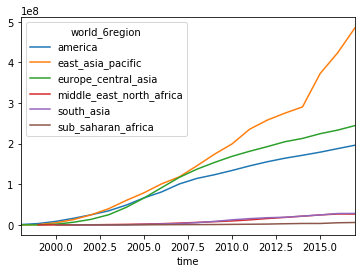

In [477]:
broadband_subscribers_gdp_continent.pivot(index = "time", columns = "world_6region", values = "broadband_subscribers").plot()